Aluno: Arthur Mauricio
Lista 6b

In [459]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import time

In [432]:
def calc_erro_real(serie, val):
    erros_aux = []
    for j in range(serie.size):
        erros_aux.append(np.abs(1-(serie[j]/val)))
    return np.array(erros_aux)

### Questão 1

- Ponto Fixo

In [433]:
def ponto_fixo(f, init, max_iter = 100, erro_tol = 1e-1,g_x = None):
    g = lambda x : f(x) + x
    if g_x is not None:
        g  = g_x
    last_root = init
    root = None
    for i in range(max_iter):
        root = g(last_root)
        if np.abs((root - last_root)/root) <= erro_tol:
            print("Valor dentro do treshold de erro")
            return root
        last_root = root
    return root

In [434]:
ponto_fixo(f = lambda x : np.exp(-x) - x, init = 0, max_iter=100, erro_tol=1e-5)

Valor dentro do treshold de erro


0.56714471334657

In [435]:
ponto_fixo(f = lambda x : np.exp(-x) - x, init = 0, max_iter=7)

Valor dentro do treshold de erro


0.5796123355033789

- Newton

In [436]:
def newton_raphson(f, df, init, max_iter = 100, erro_tol = 1e-3):
    x_ant = init
    x = None
    for i in range(max_iter):
        x = x_ant - (f(x_ant)/df(x_ant))
        if np.abs((x - x_ant)/x) <= erro_tol:
            print("Valor dentro do threshold de erro")
            return x
    print("Máximo de iterações alcançado")
    return x

In [437]:
f = lambda x : np.exp(-x) - x
df = lambda x : - np.exp(-x) - 1

In [438]:
imp_raiz = newton_raphson(f = f,df = df, init = 1)

Máximo de iterações alcançado


Comparando com o valor da biblioteca opt:

In [439]:
opt_raiz = opt.root_scalar(f, fprime=df, x0=0,method='newton').root

Erro entre raiz da minha implementação do algoritmo de Newton_Raphson com a imlpementação do scipy

In [440]:
calc_erro_real(np.array([imp_raiz]), opt_raiz)

array([0.05159269])

Erro da minha implementaçõ do algoritmo de ponto fixo com a implementação do scipy

In [441]:
imp_ponto_fixo = ponto_fixo(f = f, init=1, erro_tol=1e-1)

Valor dentro do treshold de erro


In [442]:
opt_ponto_fixo = opt.fixed_point(f, x0=1, xtol=1e-1)

In [443]:
calc_erro_real(np.array([imp_ponto_fixo]), opt_ponto_fixo)

array([0.64786915])

- Secante

In [444]:
def secante(f, x0,x1, max_iter = 100, erro_tol = 1e-5):
    x = None
    for i in range(max_iter):
        x = x0 - (f(x0) * (x1 - x0)/(f(x1) - f(x0)))
        if np.abs((x-x0)/x) < erro_tol:
            print(f"nº de iterações: {i}")
            print("Convergiu")
            return x
        x0 = x1
        x1 = x
    print("Máximo de iterações atingido")
    return x

In [445]:
secante(lambda x: np.cos(x) - x, -1, 0)

nº de iterações: 6
Convergiu


0.739085133215161

Comparando com o valor de biblioteca scipy:

In [446]:
opt.root_scalar(lambda x: np.cos(x) -x, method='secant', x0=-1, x1=0)

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 0.7390851332151606

## Questão 2

In [447]:
f = lambda x : 2*np.sin(np.sqrt(x)) - x

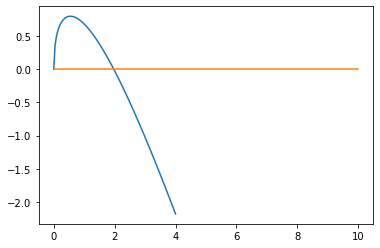

In [448]:
x = np.linspace(0,4, 100)
plt.plot(x, f(x))
plt.plot([0,10],[0,0])
plt.show()

In [449]:
opt.fixed_point(f, x0=0.5,xtol=1e-5)

array(0.76864886)

In [450]:
ponto_fixo(f,0.5, erro_tol=1e-5)

Valor dentro do treshold de erro


1.9723804860817313

a)

In [451]:
f = lambda x : (2*np.power(x,3)) - (11.7*np.power(x, 2)) + ((17.7*x) - 5)

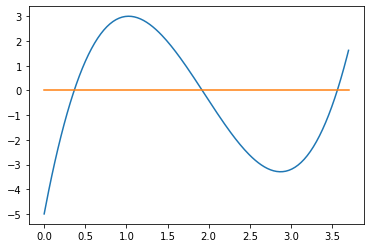

In [452]:
x_axis = np.linspace(0, 3.7, 200)
plt.plot(x_axis, f(x_axis))
plt.plot([0,3.7],[0,0])
plt.show()

1º raiz: entre 0 e 0.5
2º raiz: ~2.2
3º raiz: ~3.6

b)

In [453]:
g_x = lambda x : 5/(2*np.power(x,2) - (11.7*x) + 17.7)
ponto_fixo(f,3,  g_x= g_x)

Valor dentro do treshold de erro


0.36038995533318985

c)

In [454]:
df = lambda x : (6*np.power(x,2)) - (23.4 * x) + 17.7
newton_raphson(f,df,3)

Máximo de iterações alcançado


5.13333333333332

In [455]:
opt.root_scalar(f,fprime=df,x0=3, method='newton')

      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 8
           root: 3.5631608248620537

### Questão 4

In [456]:
def regula_falsi(x_i, x_u,f, n = 10):
    if (np.sign(f(x_i)) * np.sign(f(x_u))) != -1:
        raise Exception("Não existe raiz nesse intervalo")
    x = None

    for i in range(n):
        x = x_u - (f(x_u) * ((x_u-x_i)/(f(x_u)-f(x_i))))
        if f(x) == 0:
            return x
        else:
            if np.sign(f(x_i)) * np.sign(f(x_u)) == -1:
                x_i = x
            else:
                x_u = x
    print("Máximo de iterações atingido")
    return x


def bissecao(a,b,f, erro_tol = 1e-10, max_it = 10):
    i,a_i,b_i = 0,a,b
    erro, x_ant, x = 1, a, a
    if (np.sign(f(a)) * np.sign(f(b))) != -1:
        raise Exception("Não existe raiz nesse intervalo")
    else:
        while erro > erro_tol:
            x = (a_i+b_i)/2
            sign_inf = np.sign(f(a_i))
            sign_sup = np.sign(f(x))
            if f(x)==0:
                return x
            else:
                if sign_inf * sign_sup == -1:
                    b_i = x
                else:
                    a_i = x
            i+=1
            erro = np.abs((x - x_ant)/x)
            x_ant = x
            i = i+1
            if i == max_it:
                print("Máximo de iterações atingido")
                return x
    print("Convergiu")
    print(f"nº de iterações: {i}")
    return x

In [461]:
def analise_func_questao4(f, a, b, df):
    start = time.time()
    falsa_pos = regula_falsi(x_i=a, x_u=b, f = f, n=200)
    end = time.time()
    print(f"Resultado regula falsi: {falsa_pos}\nLevou {end - start} ms tempo")
    start = time.time()
    newton = newton_raphson(f = f, init=1, df = df, max_iter=200, erro_tol=1e-9)
    end = time.time()
    print(f"Resultado newton: {newton}\nLevou {end - start} ms tempo")
    start = time.time()
    secante_res = secante(f = f, x0=a, x1= b, max_iter=200, erro_tol=1e-9)
    end = time.time()
    print(f"Resultado seacnte: {secante_res}\nLevou {end - start} ms tempo")
    start = time.time()
    bissecao_res = bissecao(a = a, b= b, f = f, max_it=200, erro_tol=10e-9)
    end = time.time()
    print(f"Resultado bissecao: {bissecao_res}\nLevou {end - start} ms tempo")

In [462]:
f = lambda x : 2*np.power(x,4) + 4*np.power(x,3) + 3 * np.power(x,2) - 10*x-15
df = lambda x: 8*np.power(x, 3) + 12 * np.power(x,2) + 6 * x - 10
analise_func_questao4(f, 0, 3,df)

Máximo de iterações atingido
Resultado regula falsi: 1.4928787086636035
Levou 0.01689004898071289 ms tempo
Máximo de iterações alcançado
Resultado newton: 2.0
Levou 0.0040740966796875 ms tempo
nº de iterações: 11
Convergiu
Resultado seacnte: -1.3003841326439196
Levou 0.0005066394805908203 ms tempo
Convergiu
nº de iterações: 56
Resultado bissecao: 1.4928787015378475
Levou 0.0010378360748291016 ms tempo
